# Part 1

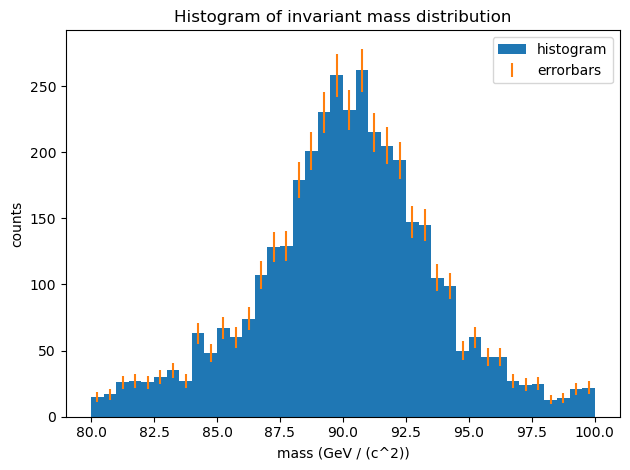

In [1]:
#Lab 3

#Part 1

#importing
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('C:/Users/alane/Downloads/Phys265/atlas_z_to_ll.csv',skiprows=1,delimiter=',')

#defining arrays to store the mass and four-momentum.
four_momentum_array = np.zeros((len(data[:,1]),4))
mass_array = np.zeros(len(data[:,1]))

#looping over the data array to calculate the four-momentum and mass of each datapoint
for x in range(len(data[:,1])):
    #extracting values from the array
    PT1 = data[x][0]
    PT2 = data[x][1]
    eta1 = data[x][2]
    eta2 = data[x][3]
    phi1 = data[x][4]
    phi2 = data[x][5]
    E1 = data[x][6]
    E2 = data[x][7]

    #Calculating Px, Py, Pz.
    Px1 = PT1 * np.cos(phi1)
    Py1 = PT1 * np.sin(phi1)
    Pz1 = PT1 * np.sinh(eta1)
    
    Px2 = PT2 * np.cos(phi2)
    Py2 = PT2 * np.sin(phi2)
    Pz2 = PT2 * np.sinh(eta2)

    #creating the four-momentum array
    four_momentum_array[x][0] = E1 + E2
    four_momentum_array[x][1] = Px1 + Px2
    four_momentum_array[x][2] = Py1 + Py2
    four_momentum_array[x][3] = Pz1 + Pz2

    #calculating the mass and putting into the mass array
    mass_array[x] = np.sqrt((four_momentum_array[x][0])**2 - 
                            ((four_momentum_array[x][1])**2 + (four_momentum_array[x][2])**2 + (four_momentum_array[x][3])**2))

#creating a histogram
bins = np.linspace(80,100,41)
fig, ax = plt.subplots()
hist = ax.hist(mass_array, bins=bins,label='histogram')
ax.set_xlabel('mass (GeV / (c^2))')
ax.set_ylabel('counts')
ax.set_title('Histogram of invariant mass distribution')

#creating an errorbar
error = np.sqrt(hist[0])

midpoint = np.zeros(len(hist[1])-1)
for i in range(len(hist[1])-1):
    midpoint[i] = (hist[1][i] + hist[1][i+1]) / 2


ax.errorbar(midpoint,hist[0],yerr=error,ls='',label='errorbars')
ax.legend()
fig.tight_layout()

# Part 2

the best fit value for the mass is 90.341 GeV/c^2, with an uncertainty of 0.0087.
The best fit value for the width parameter is 6.391, with an uncertainty of 0.033.

The chi^2 value for the data is 10.0. With 10 degrees of freedom, the reduced chi^2 is 1.0. The
p-value for for the fit is 0.4. This indicates good agreement between our fit and the data within the fitting range.

The number of standard deviations between our fitted value and the
literature accepted value is 94.439 standard deviations



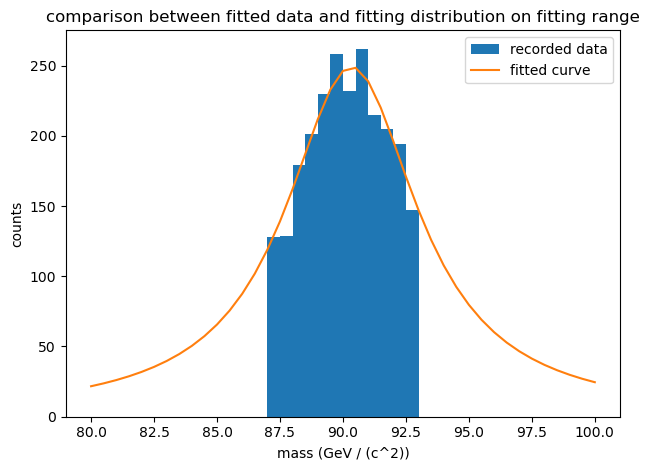

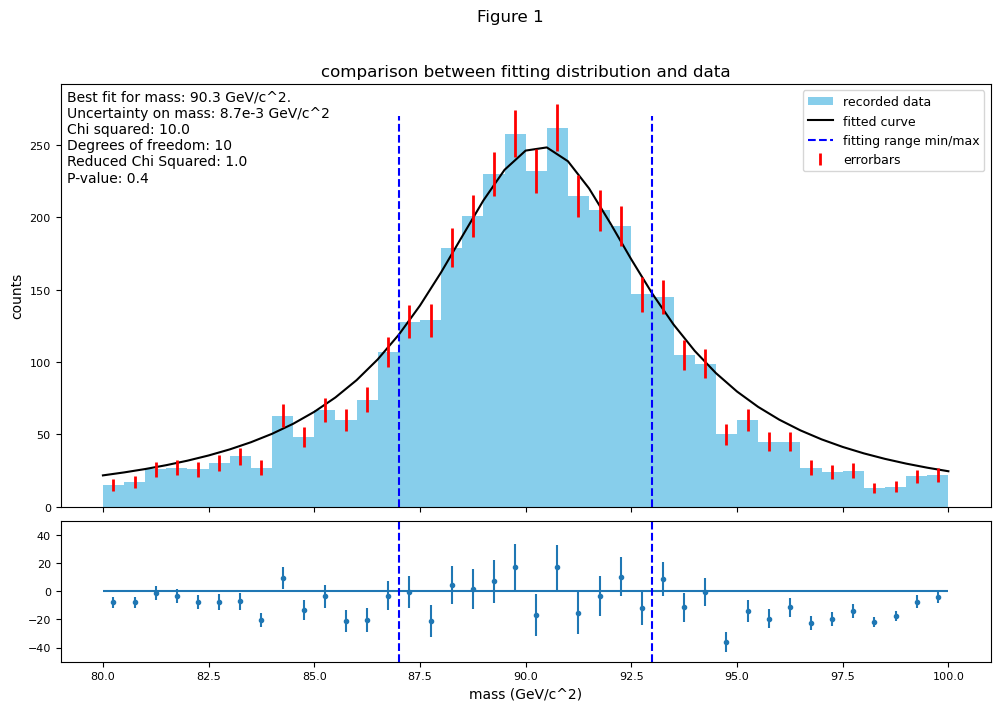

In [2]:
#Part 2

#importing
from scipy.optimize import curve_fit

#setting constants
m0 = 91.188

#creating the function
def D(m, m0, Gamma):
    return (1/np.pi) * (Gamma / 2) / ( (m-m0)**2 + (Gamma/2)**2 )

#adjusting the function to be 2500 times the original
def D_multiplied(m,m0,Gamma):
    return 2500*(1/np.pi) * (Gamma / 2) / ( (m-m0)**2 + (Gamma/2)**2 )

#I realize my process here is a bit long and it could be shorter but I wasn't thinking about it right at first
#creating a mass array of the values for mass is between 87 and 93
mass_array_adjusted = np.array([])
for i in range(len(mass_array)):
    if mass_array[i] <= 93 and mass_array[i] >= 87:
        mass_array_adjusted = np.append(mass_array_adjusted, mass_array[i])


#re-plotting to get new hist values
bins = np.linspace(80,100,41)
fig, ax = plt.subplots()
hist = ax.hist(mass_array_adjusted, bins=bins,label='recorded data')
ax.set_xlabel('mass (GeV / (c^2))')
ax.set_ylabel('counts')
ax.set_title('comparison between fitted data and fitting distribution on fitting range')

#grabbing the hist values where counts are non-zero
hist_counts_nonzero = np.array([])
hist_bins_nonzero = np.array([])
for i in range(len(hist[0])):
    if hist[0][i] > 1:
        hist_counts_nonzero = np.append(hist_counts_nonzero, hist[0][i])
        hist_bins_nonzero = np.append(hist_bins_nonzero, (hist[1][i] + hist[1][i+1])/2)

#creating an array of error values
sigma_array = np.sqrt(hist_counts_nonzero)

#doing the fitting
params, covar = curve_fit(f=D_multiplied, xdata = hist_bins_nonzero, ydata = hist_counts_nonzero, sigma = sigma_array, absolute_sigma = True)

#plotting the theoretical data
x_array = np.linspace(80,100,41)
ax.plot(x_array, D_multiplied(x_array,params[0],params[1]), label='fitted curve')
ax.legend()
fig.tight_layout()


#replotting across entire range
fig2, (ax2, ax3) = plt.subplots(2, 1, sharex=True, figsize=(12, 7.5),
    gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

hist = ax2.hist(mass_array, bins=bins,label='recorded data',color='skyblue')
#ax2.set_xlabel('mass (GeV / (c^2))')
ax2.set_ylabel('counts')
ax2.set_title('comparison between fitting distribution and data')
ax2.plot(x_array, D_multiplied(x_array,params[0],params[1]), label='fitted curve',color='black')

#plotting vertical and horizontal lines 
ax2.vlines(87,0,270,color='blue',ls='--',label='fitting range min/max')
ax2.vlines(93,0,270,color='blue',ls='--')
ax2.errorbar(midpoint,hist[0],yerr=error,ls='',label='errorbars',c='red',linewidth=2)
ax2.legend(fontsize='9')

#plotting the residuals
fitted_vals = D_multiplied(midpoint,params[0],params[1])

ax3.errorbar(midpoint, hist[0] - fitted_vals,yerr=error,ls='',marker='.')
ax3.hlines(0,80,100)
ax3.vlines(87,-50,50,color='blue',ls='--',label='fitting range min/max')
ax3.vlines(93,-50,50,color='blue',ls='--')
ax3.set_ylim(-50,50)
ax3.tick_params(labelsize='8')
ax2.tick_params(labelsize='8')
ax3.set_xlabel('mass (GeV/c^2)')
fig2.suptitle('Figure 1')
fig2.text(x=0.13,y=0.75,
s='''Best fit for mass: 90.3 GeV/c^2.
Uncertainty on mass: 8.7e-3 GeV/c^2
Chi squared: 10.0 
Degrees of freedom: 10
Reduced Chi Squared: 1.0
P-value: 0.4''')

#printing the fitted values
print(f'''the best fit value for the mass is {params[0]:.3f} GeV/c^2, with an uncertainty of {covar[0][0]:.4f}.
The best fit value for the width parameter is {params[1]:.3f}, with an uncertainty of {covar[1][1]:.3f}.\n''')

#calculating the chisquared
#creating an array of the midpoints within the range
midpoints_fitting_range = np.array([])
for i in range(len(hist[1])):
    if hist[1][i] < 93 and hist[1][i] >= 87:
        midpoints_fitting_range = np.append(midpoints_fitting_range, (hist[1][i] + 0.25))

#evaluating in the fitting function
fitted_vals_fitting_range = D_multiplied(midpoints_fitting_range, params[0], params[1])

#calculated chi squared
chi_squared = np.sum(((fitted_vals_fitting_range - hist_counts_nonzero) / np.sqrt(hist_counts_nonzero)) ** 2)
#reduced chi squared
chi_squared_reduced = chi_squared / (len(fitted_vals_fitting_range)-2)

#importing stats
import scipy.stats as st

#calculating the p-value
pvalue = st.chi2.sf(chi_squared, len(fitted_vals_fitting_range)-2)

#printing results
print(f'''The chi^2 value for the data is {chi_squared:.1f}. With 10 degrees of freedom, the reduced chi^2 is {chi_squared_reduced:.1f}. The
p-value for for the fit is {pvalue:.1f}. This indicates good agreement between our fit and the data within the fitting range.\n''')

print(f'''The number of standard deviations between our fitted value and the
literature accepted value is {abs((params[0]-91.188)/(np.sqrt(covar[0][0]**2 + 0.002**2))):.3f} standard deviations\n''')




#part 2 of step 6 needs to be done

# Part 3

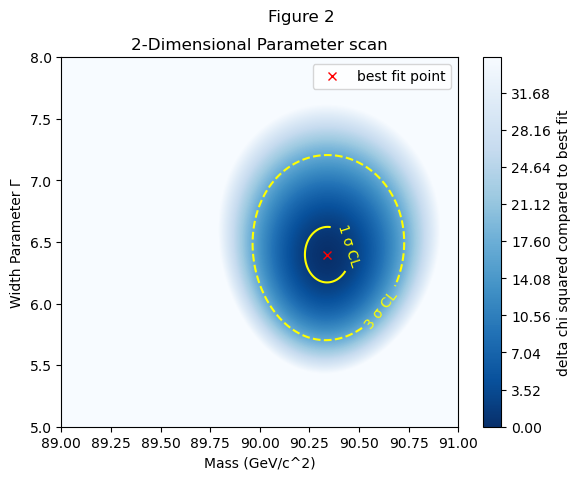

In [3]:
#Part 3

#defining our chi^2 map range
nbins = 300
chi_map = np.zeros((nbins,nbins))

m0_array = np.linspace(89,91,nbins)
Gamma_array = np.linspace(5,8,nbins)

for i in range(nbins):
    for j in range(nbins):
        theory_array = D_multiplied(hist_bins_nonzero,m0_array[i],Gamma_array[j])
        chi2 = np.sum((theory_array-hist_counts_nonzero)**2/np.sqrt(hist_counts_nonzero)**2)
        chi_map[j,i] = chi2

chi_min = np.min(chi_map)
#print(chi_min)
chi_map_clipped = np.clip(chi_map, chi_min, chi_min+35)
delta_chi_map = chi_map_clipped - chi_min

X,Y = np.meshgrid(m0_array, Gamma_array)
fig2, ax2 = plt.subplots()
chi_space =  ax2.contourf(X, Y, delta_chi_map, 500, cmap='Blues_r')
cbar = fig2.colorbar(chi_space, ax=ax2)
cbar.set_label('delta chi squared compared to best fit')
ax2.plot(params[0],params[1],marker='x',color='red',label='best fit point',ls='')

#adding the levels for the 1 and 3 sigma confidence levels
#1 sigma: 68% confidence level. 3 sigma: 99.7% confidence level
#want p-values to be: 1 sigma: .32, 3 sigma: 0.003
#manually testing to reach these values

#print(st.chi2.sf(11.5, 10))
#print(st.chi2.sf(26.6, 10))
    #The above two print statements produced p-values very close to the desired 68% and 99.7% Confidence levels

#adding the contours
levels = [11.5-chi_min,26.6-chi_min]
Chi_levels = ax2.contour(X,Y,delta_chi_map, levels=(levels), colors=['yellow','yellow'],linestyles=['solid','dashed'])

#labelling the contours
fmt = {}
strings = ['1 σ CL', '3 σ CL']
for a, b in zip(Chi_levels.levels, strings):
    fmt[a] = b

ax.clabel(Chi_levels, [11.5-chi_min,26.6-chi_min],fmt=fmt)

ax2.set_xlabel('Mass (GeV/c^2)')
ax2.set_ylabel('Width Parameter Γ')
ax2.set_title('2-Dimensional Parameter scan')
fig2.suptitle('Figure 2')
ax2.legend()






#do c-label

#fix plot